**Python version:**  3.x

In [3]:
# set the path of the directories where your modules and files are
modules_path = 'C:\\Users\loren\Documents\Progetti\__repo__\_Modules_LF95'
files_path = 'C:\\Users\loren\Documents\Progetti\Scuola\DataMining_Advanced\_files'

#### Moduli

In [5]:
import os
import sys

if os.path.isdir(modules_path) and (modules_path not in sys.path):
    sys.path.append(modules_path)

files_list = os.listdir(files_path)
print('available files for the project:', files_list, sep='\n')

%matplotlib inline

from data_science.preprocessing import df_handle
from data_science.preprocessing import data_understanding
from data_science.preprocessing import data_preparation
from data_science.modeling import time_series_modeling
from data_science.evaluation import time_series_evaluation

available files for the project:
['dataset.csv', 'datatest.txt', 'datatest2.txt', 'datatraining.txt', 'Immagini', 'test1.csv', 'test2.csv', 'training.csv', '_Report']


In [6]:
df, ts = df_handle.import_df(file_name='dataset.csv', search_in_folder=files_path,
                             date_col_name='date', ts_name='Temperature', time_freq='min', interpolate_ts=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,hour,minute,second
date,,,,,,,,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1,2015,2,2,14,19,0
2015-02-02 14:20:00,23.7180,26.2900,578.400000,760.400000,0.004773,1,2015,2,2,14,20,0
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1,2015,2,2,14,21,0
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1,2015,2,2,14,22,0
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1,2015,2,2,14,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1,2015,2,18,9,15,0
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1,2015,2,18,9,16,0
2015-02-18 09:17:00,20.8900,27.7450,423.500000,1521.500000,0.004237,1,2015,2,18,9,17,0


In [7]:
ts

2015-02-02 14:19:00    23.7000
2015-02-02 14:20:00    23.7180
2015-02-02 14:21:00    23.7300
2015-02-02 14:22:00    23.7225
2015-02-02 14:23:00    23.7540
                        ...   
2015-02-18 09:15:00    20.8150
2015-02-18 09:16:00    20.8650
2015-02-18 09:17:00    20.8900
2015-02-18 09:18:00    20.8900
2015-02-18 09:19:00    21.0000
Freq: T, Name: Temperature, Length: 22741, dtype: float64

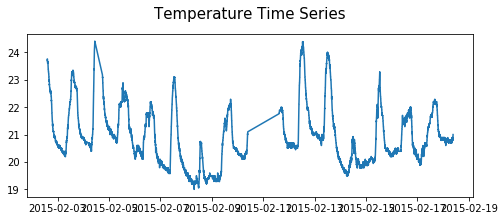

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.plot(ts)
plt.title('Temperature Time Series', pad=15, size=15)
plt.show()

In [10]:
ts = ts.iloc[ts.index.get_loc('2015-02-03 00:00:00') : ts.index.get_loc('2015-02-10 00:00:00')]

In [11]:
ts

2015-02-03 00:00:00    20.600000
2015-02-03 00:01:00    20.600000
2015-02-03 00:02:00    20.600000
2015-02-03 00:03:00    20.633333
2015-02-03 00:04:00    20.600000
                         ...    
2015-02-09 23:55:00    20.390000
2015-02-09 23:56:00    20.390000
2015-02-09 23:57:00    20.390000
2015-02-09 23:58:00    20.390000
2015-02-09 23:59:00    20.390000
Freq: T, Name: Temperature, Length: 10080, dtype: float64

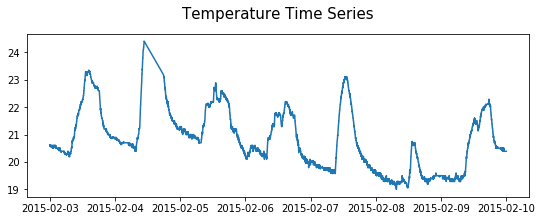

In [12]:
plt.figure(figsize=(9,3))
plt.plot(ts)
plt.title('Temperature Time Series', pad=15, size=15)
plt.show()

In [9]:
time_series.stationarity_test(ts=ts)

Results of Dickey-Fuller Test:
Test Statistic                    -2.783043
p-value                            0.060737
#Lags Used                        26.000000
Number of Observations Used    10053.000000
Critical Value (1%)               -3.431001
Critical Value (5%)               -2.861828
Critical Value (10%)              -2.566923
dtype: float64


In [10]:
stationary_ts=data_preparation.stationarize_ts(ts, mov_avg_periods=300)
stationary_ts

2015-02-03 04:59:00   -0.005734
2015-02-03 05:00:00   -0.005700
2015-02-03 05:01:00   -0.005666
2015-02-03 05:02:00   -0.005632
2015-02-03 05:03:00   -0.005592
                         ...   
2015-02-09 23:55:00   -0.007828
2015-02-09 23:56:00   -0.007698
2015-02-09 23:57:00   -0.007568
2015-02-09 23:58:00   -0.007438
2015-02-09 23:59:00   -0.007324
Freq: T, Name: Temperature, Length: 9781, dtype: float64

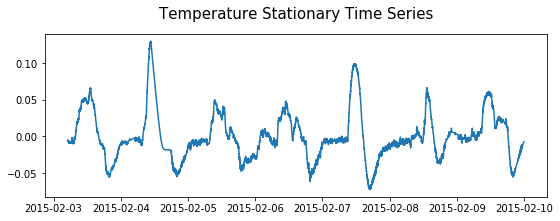

In [11]:
plt.figure(figsize=(9,3))
plt.plot(stationary_ts)
plt.title('Temperature Stationary Time Series', pad=15, size=15)
plt.show()

In [12]:
time_series.stationarity_test(ts=stationary_ts)

Results of Dickey-Fuller Test:
Test Statistic                   -4.617359
p-value                           0.000120
#Lags Used                       26.000000
Number of Observations Used    9754.000000
Critical Value (1%)              -3.431021
Critical Value (5%)              -2.861836
Critical Value (10%)             -2.566928
dtype: float64


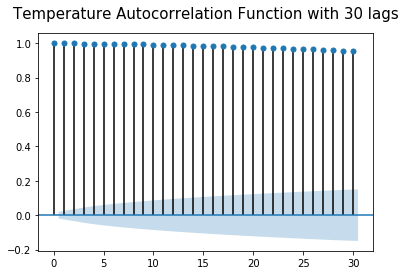

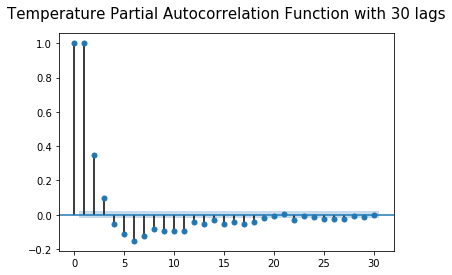

In [13]:
time_series.autocorr_func(stationary_ts)

# Forecast

## Analysis on not Stationary Series

In [14]:
ts

2015-02-03 00:00:00    20.600000
2015-02-03 00:01:00    20.600000
2015-02-03 00:02:00    20.600000
2015-02-03 00:03:00    20.633333
2015-02-03 00:04:00    20.600000
                         ...    
2015-02-09 23:55:00    20.390000
2015-02-09 23:56:00    20.390000
2015-02-09 23:57:00    20.390000
2015-02-09 23:58:00    20.390000
2015-02-09 23:59:00    20.390000
Freq: T, Name: Temperature, Length: 10080, dtype: float64

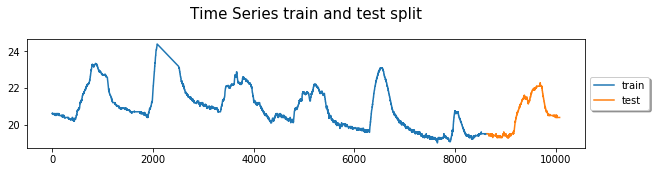

In [15]:
selected_ts = ts

ts_train, ts_test = df_handle.forecast_setup(ts = selected_ts, time_split_idx = '2015-02-08 23:59:00')

## \Holt\

In [16]:
smoothing_level=0.01
smoothing_slope=0.1
forecaster = time_series.Holt(ts_train).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)

C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


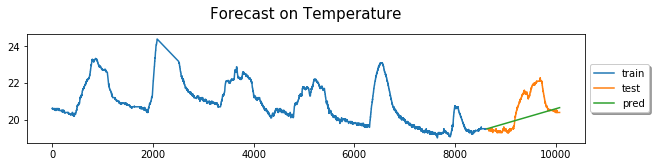

R2: 0.27857119289651144

Mean Absolute Percentage Error: 0.03391771685110763
MAX Absolute Percentage Error: 0.0956425207836072
Total Absolute Percentage Error: 48.8754299824461

Root Mean Squared Error: 0.9089727886952919

Mean Absolute Error: 0.6832446994513115
Median Absolute Error: 0.41269249787730544


In [17]:
time_series_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

## \Exponential Smoothing\

In [18]:
seasonal_periods=1440

forecaster = time_series.ExponentialSmoothing(ts_train, seasonal_periods=seasonal_periods, trend=None, seasonal='add').fit()

C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


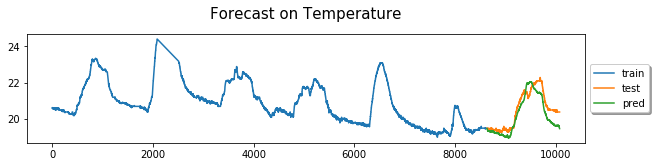

R2: 0.8012424494133102

Mean Absolute Percentage Error: 0.020041289778189624
MAX Absolute Percentage Error: 0.04697637680874608
Total Absolute Percentage Error: 28.879498570371272

Root Mean Squared Error: 0.47710718872291347

Mean Absolute Error: 0.40730725521658057
Median Absolute Error: 0.37485209806777675


In [19]:
time_series_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

## Analysis on Stationary Series

In [20]:
stationary_ts

2015-02-03 04:59:00   -0.005734
2015-02-03 05:00:00   -0.005700
2015-02-03 05:01:00   -0.005666
2015-02-03 05:02:00   -0.005632
2015-02-03 05:03:00   -0.005592
                         ...   
2015-02-09 23:55:00   -0.007828
2015-02-09 23:56:00   -0.007698
2015-02-09 23:57:00   -0.007568
2015-02-09 23:58:00   -0.007438
2015-02-09 23:59:00   -0.007324
Freq: T, Name: Temperature, Length: 9781, dtype: float64

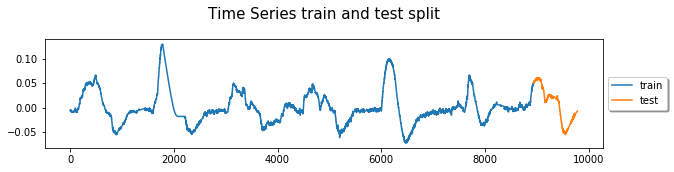

In [21]:
selected_ts = stationary_ts

ts_train, ts_test = df_handle.forecast_setup(ts = selected_ts, time_split_idx = '2015-02-09 10:00:00')

## \Simple Exponential Smoothing\

In [22]:
smooth_level = 0

forecaster = time_series.SimpleExpSmoothing(ts_train).fit(smoothing_level=smooth_level, optimized=True)

C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


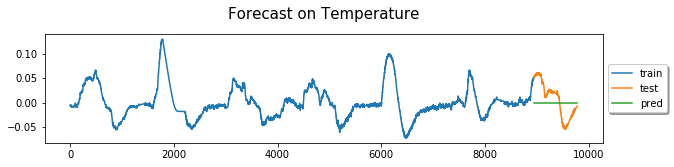

R2: -5.085549776628895e-06

Mean Absolute Percentage Error: inf
MAX Absolute Percentage Error: inf
Total Absolute Percentage Error: inf

Root Mean Squared Error: 0.03616224290417041

Mean Absolute Error: 0.03207938702629402
Median Absolute Error: 0.02594936818094573


In [23]:
time_series_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

## \ARIMA\

In [24]:
forecaster = time_series.ARIMA(ts_train, order=(4, 0, 1)).fit()

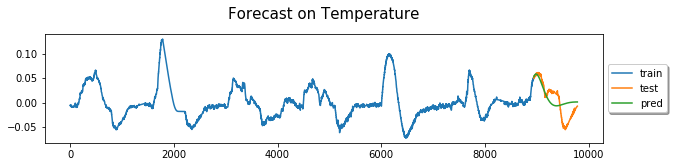

R2: 0.5143686036695954

Mean Absolute Percentage Error: 35.81368868055387
MAX Absolute Percentage Error: 5569.451771263916
Total Absolute Percentage Error: 30083.49849166526

Root Mean Squared Error: 0.02520041152506936

Mean Absolute Error: 0.020660108604954267
Median Absolute Error: 0.020141139353085844


In [25]:
time_series_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

## \Exponential Smoothing\

In [26]:
seasonal_periods=1440

forecaster = time_series.ExponentialSmoothing(ts_train, seasonal_periods=seasonal_periods, trend=None, seasonal='add').fit()

C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


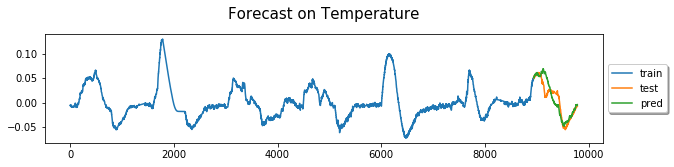

R2: 0.7795791667895566

Mean Absolute Percentage Error: 2.805121123128985
MAX Absolute Percentage Error: 965.2821370087678
Total Absolute Percentage Error: 2356.3017434283474

Root Mean Squared Error: 0.016977767214916062

Mean Absolute Error: 0.012125621140874895
Median Absolute Error: 0.007166017398773553


In [27]:
time_series_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

# Analysis on 1 Hour freq TS

In [28]:
df, ts = df_handle.import_df(file_name='dataset.csv', search_in_folder=files_path,
                             date_col_name='date', ts_name='Temperature', time_freq='H', interpolate_ts=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,hour,minute,second
date,,,,,,,,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1,2015,2,2,14,19,0
2015-02-02 14:20:00,23.7180,26.2900,578.400000,760.400000,0.004773,1,2015,2,2,14,20,0
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1,2015,2,2,14,21,0
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1,2015,2,2,14,22,0
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1,2015,2,2,14,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1,2015,2,18,9,15,0
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1,2015,2,18,9,16,0
2015-02-18 09:17:00,20.8900,27.7450,423.500000,1521.500000,0.004237,1,2015,2,18,9,17,0


In [29]:
ts

2015-02-02 14:19:00    23.700
2015-02-02 15:19:00    23.390
2015-02-02 16:19:00    22.890
2015-02-02 17:19:00    22.540
2015-02-02 18:19:00    22.200
                        ...  
2015-02-18 05:19:00    20.790
2015-02-18 06:19:00    20.790
2015-02-18 07:19:00    20.745
2015-02-18 08:19:00    20.700
2015-02-18 09:19:00    21.000
Freq: H, Name: Temperature, Length: 380, dtype: float64

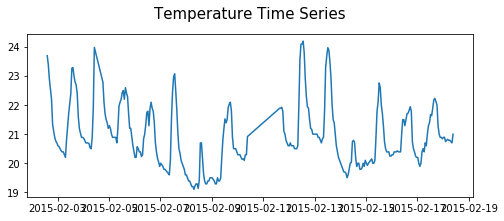

In [30]:
plt.figure(figsize=(8,3))
plt.plot(ts)
plt.title('Temperature Time Series', pad=15, size=15)
plt.show()

In [31]:
stationary_ts=data_preparation.remove_trend_ts(ts, mov_avg_periods=5)
stationary_ts

2015-02-02 18:19:00   -0.744000
2015-02-02 19:19:00   -1.132000
2015-02-02 20:19:00   -0.914000
2015-02-02 21:19:00   -0.724000
2015-02-02 22:19:00   -0.498000
                         ...   
2015-02-18 05:19:00   -0.017667
2015-02-18 06:19:00    0.002333
2015-02-18 07:19:00   -0.042667
2015-02-18 08:19:00   -0.069667
2015-02-18 09:19:00    0.195000
Freq: H, Name: Temperature, Length: 376, dtype: float64

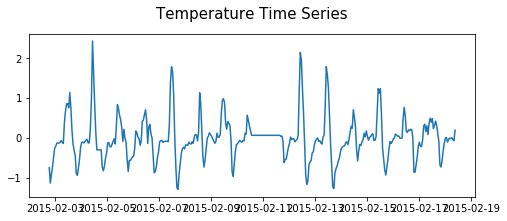

In [32]:
plt.figure(figsize=(8,3))
plt.plot(stationary_ts)
plt.title('Temperature Time Series', pad=15, size=15)
plt.show()

In [33]:
time_series.stationarity_test(ts=ts)

Results of Dickey-Fuller Test:
Test Statistic                -6.393255e+00
p-value                        2.080686e-08
#Lags Used                     1.000000e+00
Number of Observations Used    3.780000e+02
Critical Value (1%)           -3.447769e+00
Critical Value (5%)           -2.869217e+00
Critical Value (10%)          -2.570860e+00
dtype: float64


In [34]:
from pandas.tseries.offsets import DateOffset
stationary_ts.index[0] + DateOffset(hours=302)

Timestamp('2015-02-15 08:19:00', freq='H')

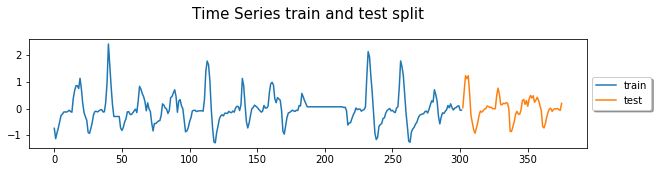

In [35]:
selected_ts = stationary_ts

ts_train, ts_test = df_handle.forecast_setup(ts = selected_ts, split_idx = 302)

## \Seasonal ARIMA\

In [36]:
forecaster = time_series.SARIMAX(endog=ts_train, seasonal_order=(4, 0, 1, 24),
                              enforce_stationarity=False).fit(disp=False)

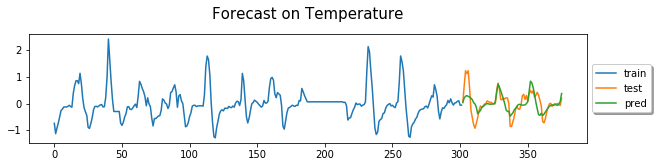

R2: 0.36920525842452756

Mean Absolute Percentage Error: 4.337956927900004
MAX Absolute Percentage Error: 73.91126247592263
Total Absolute Percentage Error: 321.00881266460044

Root Mean Squared Error: 0.35286278679669836

Mean Absolute Error: 0.24783052521846438
Median Absolute Error: 0.16663563095851097


In [37]:
time_series_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)